Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)


開始訓練模型 (同 Assignment 1)...
Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1217 - val_loss: 0.0576
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - val_loss: 0.0055
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 7.6404e-04
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5442e-04 - val_loss: 4.3636e-04
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2603e-04 - val_loss: 3.3904e-04
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5021e-04 - val_loss: 2.1995e-04
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3771e-04 - val_loss: 1.9094e-04
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6870e-04 - val_loss: 1.2888e-04
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2448e-04 - val_loss: 9.0207e-05
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7828e-0

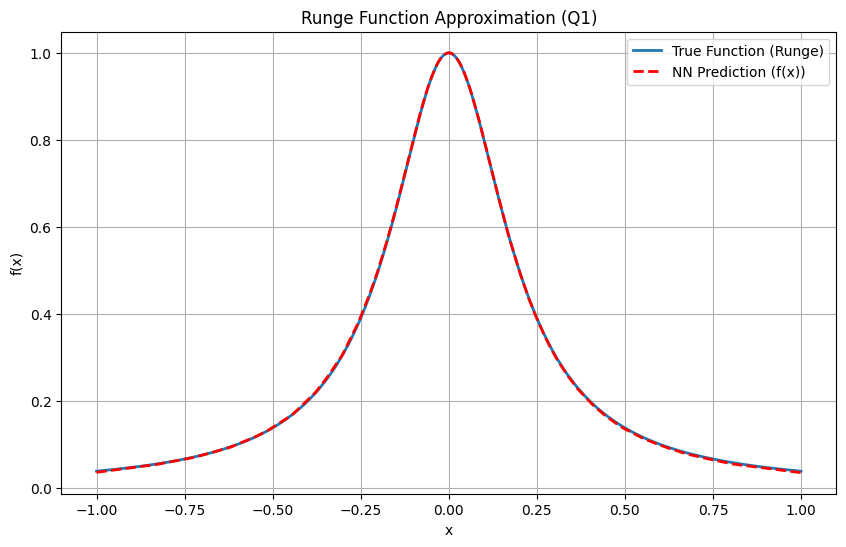

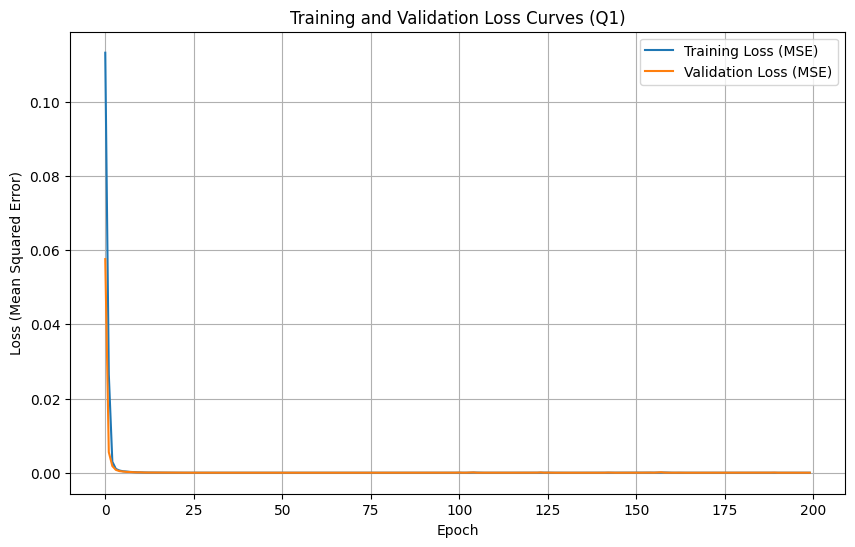


--- 問題1：計算模型導數的誤差 ---


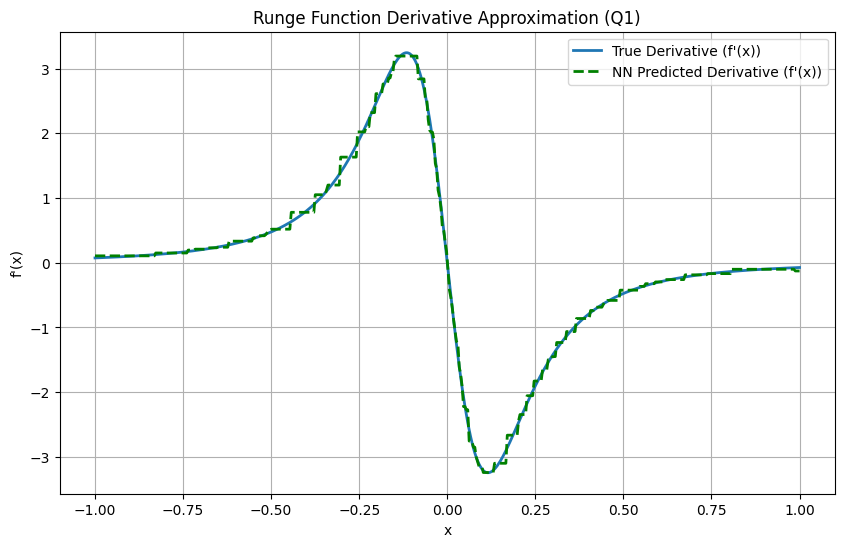


--- 導數錯誤報告 ---
模型導數在測試集上的 Mean Squared Error (MSE): 0.00318956
模型導數在測試集上的 Maximum Error: 0.23445223


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

def runge_function(x):
    """Runge 函數"""
    return 1 / (1 + 25 * x**2)

# Runge 函數的真實導數
def runge_derivative(x):
    """Runge 函數的一階導數 f'(x)"""
    return (-50 * x) / ((1 + 25 * x**2)**2)

N_train = 1000
X_train = np.random.uniform(-1, 1, N_train).reshape(-1, 1)
y_train = runge_function(X_train)

N_val = 200
X_val = np.random.uniform(-1, 1, N_val).reshape(-1, 1)
y_val = runge_function(X_val)

X_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_test_true = runge_function(X_test)
y_test_true_deriv = runge_derivative(X_test) # 真實的導數值

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

print("\n開始訓練模型 (同 Assignment 1)...")
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
print("模型訓練完成！")


y_pred_nn = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true, label='True Function (Runge)', linewidth=2)
plt.plot(X_test, y_pred_nn, label='NN Prediction (f(x))', linestyle='--', linewidth=2, color='red')
plt.title('Runge Function Approximation (Q1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Curves (Q1)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- 問題1：計算模型導數的誤差 ---")

X_test_tf = tf.constant(X_test, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(X_test_tf)
    y_pred = model(X_test_tf)

dy_dx_pred = tape.gradient(y_pred, X_test_tf)

dy_dx_pred_np = dy_dx_pred.numpy()

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true_deriv, label="True Derivative (f'(x))", linewidth=2)
plt.plot(X_test, dy_dx_pred_np, label="NN Predicted Derivative (f'(x))", linestyle='--', linewidth=2, color='green')
plt.title('Runge Function Derivative Approximation (Q1)')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

deriv_mse = np.mean((y_test_true_deriv - dy_dx_pred_np)**2)
deriv_max_error = np.max(np.abs(y_test_true_deriv - dy_dx_pred_np))

print("\n--- 導數錯誤報告 ---")
print(f"模型導數在測試集上的 Mean Squared Error (MSE): {deriv_mse:.8f}")
print(f"模型導數在測試集上的 Maximum Error: {deriv_max_error:.8f}")
